In [1]:
import pandas as pd
import seaborn as sns
import sys
import os
import matplotlib.pyplot as plt
pd.options.display.max_columns = None
pd.options.display.max_rows = 100
os.chdir('/fast/work/groups/ag_kircher/ReMM/MA_Lusi/Snakemake')

### DataPrep

In [2]:
df19 = pd.read_csv('output/features/annotated/hg19/SNVs.hg19.combined.txt.gz', sep = '\t',header = None)
df38 = pd.read_csv('output/features/annotated/hg38/SNVs.hg38.combined.txt.gz', sep = '\t',header = None)
lift= pd.read_csv('output/predictions/lifted/new/hg38.predictions.lifted.txt', sep = '\t',header = None)


df38.index= df38[1].astype(str)+'-'+(df38[2]).astype(str)
df19.index= df19[1].astype(str)+'-'+(df19[2]).astype(str)
#print(df19.memory_usage().sum()/a,df38.memory_usage().sum()/a,lift.memory_usage().sum()/a)

col = pd.read_csv('input/variants/hg38/SNVs.hg38.positive.annotated.tsv.gz', sep = '\t')
#df38 = df38.drop(columns = [0])
df38.columns  = ['Score']+col.columns.str.strip().to_list()


col = pd.read_csv('input/variants/hg19/SNVs.hg19.positive.annotated.tsv.gz', sep = '\t')
#df19 = df19.drop(columns = [0])

df19.columns  = ['Score']+col.columns.str.strip().to_list()

df19.columns = df19.columns.str.replace('46way','')
df19.columns = df19.columns.str.replace('fantom','Fantom')

df38 = df38.fillna(0)
df19 = df19.fillna(0)

p = lift[2].str.split(':', expand = True)[1].astype(int)
lift.index = lift[2].str.split(':', expand = True)[0]+'-'+p.astype(str)

f = df38.join(lift,lsuffix='_38',rsuffix='_lift',how='inner')
f.index= f[0].astype(str)+'-'+(f[1]).astype(str)

ff = f.join(df19,lsuffix='_38',rsuffix='_19',how='inner')


In [6]:
ff.head()

,Score_38,CHR_38,POSITION_38,ID,CpGperGC_38,CpGperCpG_38,CpGobsExp_38,priPhyloP_38,verPhastCons_38,mamPhastCons_38,EncH3K27Ac_38,EncH3K4Me1_38,EncH3K4Me3_38,DnaseClusteredHyp_38,DnaseClusteredScore_38,Fantom5Perm_38,GerpRS_38,GerpRSpv_38,rareVar_38,commonVar_38,fracRareCommon_38,dbVARCount_38,numTFBSConserved_38,GCContent_38,priPhastCons_38,verPhyloP_38,mamPhyloP_38,ISCApath_38,DGVCount_38,Fantom5Robust_38,0,1,2,Score_19,CHR_19,POSITION_19,CpGobsExp_19,CpGperCpG_19,CpGperGC_19,DGVCount_19,DnaseClusteredHyp_19,DnaseClusteredScore_19,EncH3K27Ac_19,EncH3K4Me1_19,EncH3K4Me3_19,GCContent_19,GerpRS_19,GerpRSpv_19,ISCApath_19,commonVar_19,dbVARCount_19,Fantom5Perm_19,Fantom5Robust_19,fracRareCommon_19,mamPhastCons_19,mamPhyloP_19,numTFBSConserved_19,priPhastCons_19,priPhyloP_19,rareVar_19,verPhastCons_19,verPhyloP_19
chr1-100000176,0,chr1,99534620,.,0.0,0.0,0.0,-1.460,0.000,0.002,13.36,4.12,1.00,28.0,777.0,0.0,639.26,0.000000,43.0,2.0,0.956,10.0,1.0,0.437,0.526,-2.483,-1.066,8.0,1.0,0.0,chr1,100000176,chr1:99534620:0.038656:0,0,chr1,100000176,0.0,0.0,0.0,1.0,18.0,600.0,10.00,21.56,6.68,0.437,364.4,0.0,6.0,2.0,1.0,0.0,0.0,0.889,0.000,-2.155,0.0,0.361,-1.914,16.0,0.000,-1.609
chr1-10000026,0,chr1,9939968,.,0.0,0.0,0.0,-0.410,0.026,0.026,1.92,4.00,3.00,0.0,0.0,0.0,0.00,0.000000,253.0,7.0,0.973,28.0,0.0,0.523,0.013,-0.524,-0.362,20.0,0.0,0.0,chr1,10000026,chr1:9939968:0.000333333:0,0,chr1,10000026,0.0,0.0,0.0,0.0,0.0,0.0,2.00,5.00,13.24,0.523,0.0,0.0,13.0,4.0,0.0,0.0,0.0,0.862,0.035,-1.404,0.0,0.035,-1.489,25.0,0.040,-1.286
chr1-100000432,0,chr1,99534876,.,0.0,0.0,0.0,-0.165,0.007,0.030,10.08,2.00,4.44,0.0,0.0,0.0,90.88,0.000004,41.0,3.0,0.932,10.0,0.0,0.371,0.199,0.249,-0.105,8.0,1.0,0.0,chr1,100000432,chr1:99534876:0.0215794:0,0,chr1,100000432,0.0,0.0,0.0,1.0,0.0,0.0,5.00,11.76,4.28,0.371,0.0,0.0,6.0,3.0,1.0,0.0,0.0,0.833,0.003,0.050,0.0,0.106,-0.187,15.0,0.015,0.146
chr1-10000069,0,chr1,9940011,.,0.0,0.0,0.0,-1.433,0.002,0.007,1.92,1.88,2.00,0.0,0.0,0.0,0.00,0.000000,238.0,6.0,0.975,28.0,0.0,0.517,0.003,-1.665,-1.416,20.0,0.0,0.0,chr1,10000069,chr1:9940011:0.000333333:0,0,chr1,10000069,0.0,0.0,0.0,0.0,0.0,0.0,2.88,4.76,14.44,0.517,0.0,0.0,13.0,3.0,0.0,0.0,0.0,0.906,0.015,-1.157,0.0,0.016,-1.160,29.0,0.018,-1.110
chr1-100000837,0,chr1,99535281,.,0.0,0.0,0.0,-0.805,0.000,0.008,5.16,8.36,2.92,0.0,0.0,0.0,0.00,0.000000,36.0,7.0,0.837,10.0,1.0,0.371,0.042,0.048,-0.821,8.0,1.0,0.0,chr1,100000837,chr1:99535281:0:0,0,chr1,100000837,0.0,0.0,0.0,1.0,0.0,0.0,4.56,16.40,5.56,0.371,0.0,0.0,6.0,7.0,1.0,0.0,0.0,0.720,0.000,-0.233,1.0,0.011,-0.744,18.0,0.000,-0.227


In [4]:


col = ['CpGperGC', 'CpGperCpG', 'CpGobsExp','GCContent','EncH3K27Ac', 'EncH3K4Me1',
       'EncH3K4Me3', 'verPhyloP', 'mamPhyloP',
       'priPhyloP','priPhastCons', 'mamPhastCons','verPhastCons', 'DnaseClusteredHyp', 'DnaseClusteredScore', 
         'Fantom5Perm','Fantom5Robust','GerpRS', 'GerpRSpv', 'rareVar', 'commonVar', 'fracRareCommon',
        'numTFBSConserved',
       'ISCApath', 'DGVCount', 'dbVARCount']

len(col)


26

In [ ]:
# save the dataframe
ff.to_csv('output/predictions/lifted/new/hg38.hg19.features.combined.all.csv.gz',compression='zip', sep = '\t' )

In [17]:
ff.head()

,Score_38,CHR_38,POSITION_38,ID,CpGperGC_38,CpGperCpG_38,CpGobsExp_38,priPhyloP_38,verPhastCons_38,mamPhastCons_38,EncH3K27Ac_38,EncH3K4Me1_38,EncH3K4Me3_38,DnaseClusteredHyp_38,DnaseClusteredScore_38,Fantom5Perm_38,GerpRS_38,GerpRSpv_38,rareVar_38,commonVar_38,fracRareCommon_38,dbVARCount_38,numTFBSConserved_38,GCContent_38,priPhastCons_38,verPhyloP_38,mamPhyloP_38,ISCApath_38,DGVCount_38,Fantom5Robust_38,0,1,2,Score_19,CHR_19,POSITION_19,CpGobsExp_19,CpGperCpG_19,CpGperGC_19,DGVCount_19,DnaseClusteredHyp_19,DnaseClusteredScore_19,EncH3K27Ac_19,EncH3K4Me1_19,EncH3K4Me3_19,GCContent_19,GerpRS_19,GerpRSpv_19,ISCApath_19,commonVar_19,dbVARCount_19,Fantom5Perm_19,Fantom5Robust_19,fracRareCommon_19,mamPhastCons_19,mamPhyloP_19,numTFBSConserved_19,priPhastCons_19,priPhyloP_19,rareVar_19,verPhastCons_19,verPhyloP_19
chr1-100000176,0,chr1,99534620,.,0.0,0.0,0.0,-1.460,0.000,0.002,13.36,4.12,1.00,28.0,777.0,0.0,639.26,0.000000,43.0,2.0,0.956,10.0,1.0,0.437,0.526,-2.483,-1.066,8.0,1.0,0.0,chr1,100000176,chr1:99534620:0.038656:0,0,chr1,100000176,0.0,0.0,0.0,1.0,18.0,600.0,10.00,21.56,6.68,0.437,364.4,0.0,6.0,2.0,1.0,0.0,0.0,0.889,0.000,-2.155,0.0,0.361,-1.914,16.0,0.000,-1.609
chr1-10000026,0,chr1,9939968,.,0.0,0.0,0.0,-0.410,0.026,0.026,1.92,4.00,3.00,0.0,0.0,0.0,0.00,0.000000,253.0,7.0,0.973,28.0,0.0,0.523,0.013,-0.524,-0.362,20.0,0.0,0.0,chr1,10000026,chr1:9939968:0.000333333:0,0,chr1,10000026,0.0,0.0,0.0,0.0,0.0,0.0,2.00,5.00,13.24,0.523,0.0,0.0,13.0,4.0,0.0,0.0,0.0,0.862,0.035,-1.404,0.0,0.035,-1.489,25.0,0.040,-1.286
chr1-100000432,0,chr1,99534876,.,0.0,0.0,0.0,-0.165,0.007,0.030,10.08,2.00,4.44,0.0,0.0,0.0,90.88,0.000004,41.0,3.0,0.932,10.0,0.0,0.371,0.199,0.249,-0.105,8.0,1.0,0.0,chr1,100000432,chr1:99534876:0.0215794:0,0,chr1,100000432,0.0,0.0,0.0,1.0,0.0,0.0,5.00,11.76,4.28,0.371,0.0,0.0,6.0,3.0,1.0,0.0,0.0,0.833,0.003,0.050,0.0,0.106,-0.187,15.0,0.015,0.146
chr1-10000069,0,chr1,9940011,.,0.0,0.0,0.0,-1.433,0.002,0.007,1.92,1.88,2.00,0.0,0.0,0.0,0.00,0.000000,238.0,6.0,0.975,28.0,0.0,0.517,0.003,-1.665,-1.416,20.0,0.0,0.0,chr1,10000069,chr1:9940011:0.000333333:0,0,chr1,10000069,0.0,0.0,0.0,0.0,0.0,0.0,2.88,4.76,14.44,0.517,0.0,0.0,13.0,3.0,0.0,0.0,0.0,0.906,0.015,-1.157,0.0,0.016,-1.160,29.0,0.018,-1.110
chr1-100000837,0,chr1,99535281,.,0.0,0.0,0.0,-0.805,0.000,0.008,5.16,8.36,2.92,0.0,0.0,0.0,0.00,0.000000,36.0,7.0,0.837,10.0,1.0,0.371,0.042,0.048,-0.821,8.0,1.0,0.0,chr1,100000837,chr1:99535281:0:0,0,chr1,100000837,0.0,0.0,0.0,1.0,0.0,0.0,4.56,16.40,5.56,0.371,0.0,0.0,6.0,7.0,1.0,0.0,0.0,0.720,0.000,-0.233,1.0,0.011,-0.744,18.0,0.000,-0.227


### Compare with CADD features

In [ ]:
#ra = ff[ff['GerpRS_38']!=0.0].sample(100000,random_state = 23421)
ra = ff.sample(70000,random_state = 23421)

ra = ra.reset_index().drop_duplicates(subset = 'index').set_index('index')
#ra.to_csv('ra.csv',header = True, index = True, sep = '\t')

d19 = pd.DataFrame()
d19['#CHROM'] = pd.Series(ra.index).str.split('-',expand = True)[0]
d19['POS'] = pd.Series(ra.index).str.split('-',expand = True)[1]
d19[['ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO']]=[".","T","A",".","PASS","."]
d19 = d19.T.reset_index().T
d19.columns = ['##fileformat=VCFv4.1']+ ['']*(d19.shape[1]-1)
d19.to_csv('chr5.pos19.vcf',header=True,index = False, sep = '\t')

d38 = pd.DataFrame()
d38['#CHROM'] = ra['CHR_38']
d38['POS'] = ra['POSITION_38']
d38[['ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO']]=[".","T","A",".","PASS","."]
d38 = d38.T.reset_index().T
d38.columns = ['##fileformat=VCFv4.1']+ ['']*(d38.shape[1]-1)
d38.to_csv('chr5.pos38.vcf',header=True,index = False, sep = '\t')
d38.head()

In [ ]:
c19 = pd.read_csv('cadd19.txt',sep = '\t',skiprows = 1)
c19['index']='chr'+c19['#Chrom'].astype(str)+'-'+c19['Pos'].astype(str)
c19 = c19.set_index(['index'])
c19.columns = c19.columns+'_cadd19'
c19.shape
c38 = pd.read_csv('cadd38.txt1',sep = '\t',skiprows = 1)
c38['index']='chr'+c38['#Chrom'].astype(str)+'-'+c38['Pos'].astype(str)
c38 = c38.set_index(['index'])
c38.columns = c38.columns+'_cadd38'


c19 = c19.reset_index().drop_duplicates(subset = 'index').set_index('index')
c38 = c38.reset_index().drop_duplicates(subset = 'index').set_index('index')
c19.shape

In [ ]:

l = pd.Series(['GC','CpG','GerpRS','EncH3K27Ac','EncH3K4Me1','EncH3K4Me3'])+'_cadd19'
#df = c19[l].join(ra,how='inner')
df = c19.join(ra,how='inner')

c19.shape


In [ ]:
df['index'] = df['CHR_38']+'-'+df['POSITION_38'].astype(str)
df = df.set_index(['index'])
df.shape

In [ ]:
l = pd.Series(['GC','CpG','GerpRS','EncodeH3K27ac-max','EncodeH3K4me1-max','EncodeH3K4me3-max'])+'_cadd38'
#df = c38[l].join(df,how='inner')
df = c38.join(df,how='inner')

df.shape

In [ ]:
cadd = df.loc[:,df.columns.str.contains('cadd', na=False)]
cadd.columns = cadd.columns.str.replace('Encode','Enc')
cadd.columns = cadd.columns.str.replace('Me','me')

In [ ]:
cadd.head()

In [ ]:
cadd.loc[:,cadd.columns.str.contains('EncH3K4me')].corr()

In [ ]:
cadd.loc[:,cadd.columns.str.contains('Gerp')].corr()

In [ ]:
def get_table(df,name):
    d = df.loc[:,df.columns.str.contains(name,na = False)].corr()
    
    d = d.loc[:,d.columns.str.contains('38')]

    d.columns = d.columns.str.replace('38','')
    d = d.loc[d.index.str.contains('19'),:]
    d.index = d.index.str.replace('19','')
    #l = d.columns.to_list()
    #d.loc[l,l]
    
    return d
    
    
    

get_table(cadd,'CG')

In [ ]:
df.loc[:,df.columns.str.contains('me1|Me1',na = False)].corr()


In [ ]:
corr = df.corr()
l = corr.columns.str.contains('Me1|me1',na = False)


In [ ]:
corr.loc[l,l]

In [ ]:
l = corr.columns.str.contains('Me3|me3',na = False)
corr.loc[l,l]

In [ ]:
df.loc[:,df.columns.str.contains('Cons',na = False)].corr()

In [ ]:
ff.loc[:,ff.columns.str.contains('Cons',na = False)].corr()

In [ ]:
c = 'Enc'
cc = ff.columns.str.contains(c,na = False)
ff.loc[:,cc].corr()
for c in df19.columns[2:]:
    cc = ff.columns.str.contains(c,na = False)

    #print((ff.iloc[:,cc].corr()))

In [ ]:
l = []
for col in df19.columns[2:]:
    a = (df19[col]==0).sum()+df19[col].isna().sum()
    b = (df38[col]==0).sum()+df38[col].isna().sum()
    cc = ff.columns.str.contains(col,na = False)
    c = ff.iloc[:,cc].corr().iloc[0,1]
    l.append([c,col,a/len(df19),b/len(df38)])
dd = pd.DataFrame(l)
dd.columns = ['Correlation','Features', 'NaN (0) in hg19','NaN (0) in hg38']


In [ ]:
dd.columns = ['Correlation','Features', 'NaN (0) in hg19','NaN (0) in hg38']
dd.to_csv('figures/nans.txt', sep = '\t')

### Heatmaps

In [4]:
## read in the data if not computed in the notebook
#ff = pd.read_csv('output/predictions/lifted/last/ff.txt.gz', sep = '\t',index_col = 'Unnamed: 0',compression = 'gzip') 

f = ff.drop(columns = ['Score_38','Score_19','CHR_38','CHR_19','ID','POSITION_38','POSITION_19'])



In [5]:
# devide into two dataframes
d38 = f.iloc[:,f.columns.str.contains('_38',na = False)]
d19 = f.iloc[:,f.columns.str.contains('_19',na = False)]
d38.columns = d38.columns.str.replace('_38','')
d19.columns = d19.columns.str.replace('_19','')

df = pd.DataFrame((d38 ==0).astype(int).sum(axis=0))/len(d38)*100
d1 = pd.DataFrame((d19 == 0).astype(int).sum(axis=0))/len(d19)*100


d2 = df.join(d1,lsuffix = 'GRCh38', rsuffix = 'GRCh19')
d2.columns = d2.columns.str[1:]
d2

d2.applymap("{0:.2f}%".format).to_latex('figures/nan.tex', index = True,column_format = 'lll')


In [7]:
d2.columns = ['GRCh38','GRCh37']
d2 = d2[['GRCh37','GRCh38']]

,GRCh38,GRCh19
CpGperGC,99.418672,99.431590
CpGperCpG,99.418672,99.431590
CpGobsExp,99.418672,99.431590
priPhyloP,0.477964,0.870000
verPhastCons,54.149916,46.165679
mamPhastCons,33.130081,47.833034
EncH3K27Ac,0.298524,2.535950
EncH3K4Me1,0.298524,1.914085
EncH3K4Me3,0.298524,0.980708
DnaseClusteredHyp,84.339062,83.246762


In [5]:
# calculte the correlation matrix
corr_matrix = f.iloc[:,:].corr()
c = corr_matrix.columns
corr_matrix = corr_matrix.loc[c,c]
corr_matrix.to_csv('figures/correlation.txt',sep = '\t')

In [2]:
# read in the correlation matrix if not calculted 
corr_matrix = pd.read_csv('figures/correlation.txt',sep = '\t',index_col = 'Unnamed: 0' )
corr_matrix

,CpGperGC_38,CpGperCpG_38,CpGobsExp_38,priPhyloP_38,verPhastCons_38,mamPhastCons_38,EncH3K27Ac_38,EncH3K4Me1_38,EncH3K4Me3_38,DnaseClusteredHyp_38,DnaseClusteredScore_38,Fantom5Perm_38,GerpRS_38,GerpRSpv_38,rareVar_38,commonVar_38,fracRareCommon_38,dbVARCount_38,numTFBSConserved_38,GCContent_38,priPhastCons_38,verPhyloP_38,mamPhyloP_38,ISCApath_38,DGVCount_38,Fantom5Robust_38,1,CpGobsExp_19,CpGperCpG_19,CpGperGC_19,DGVCount_19,DnaseClusteredHyp_19,DnaseClusteredScore_19,EncH3K27Ac_19,EncH3K4Me1_19,EncH3K4Me3_19,GCContent_19,GerpRS_19,GerpRSpv_19,ISCApath_19,commonVar_19,dbVARCount_19,Fantom5Perm_19,Fantom5Robust_19,fracRareCommon_19,mamPhastCons_19,mamPhyloP_19,numTFBSConserved_19,priPhastCons_19,priPhyloP_19,rareVar_19,verPhastCons_19,verPhyloP_19
CpGperGC_38,1.000000,0.989182,0.982429,-0.002127,0.013913,0.009919,0.003224,0.014652,0.016767,0.253574,0.150380,0.059251,0.056556,0.000488,0.134621,0.063460,0.038953,0.024047,0.383121,0.205600,0.005829,-0.005206,-0.005223,0.011618,0.026406,0.059032,-0.011256,0.946127,0.951964,0.959586,0.026314,0.364492,0.243960,0.107422,0.029000,0.351483,0.205597,0.032942,0.003384,0.016016,0.009604,0.026314,0.022849,0.008562,-0.001904,0.025902,0.003924,0.027067,0.016942,0.002928,0.020405,0.027929,0.006514
CpGperCpG_38,0.989182,1.000000,0.986559,-0.001608,0.013961,0.010503,0.003260,0.014490,0.017006,0.259719,0.152650,0.061349,0.055932,0.000520,0.133846,0.058562,0.040168,0.022916,0.392794,0.205194,0.006302,-0.004398,-0.004426,0.011092,0.024811,0.061119,-0.010659,0.950667,0.957935,0.947090,0.024730,0.370679,0.245407,0.109500,0.027483,0.360805,0.205192,0.032478,0.003596,0.015315,0.008678,0.024730,0.022582,0.008326,-0.002447,0.026560,0.004662,0.027759,0.017397,0.003171,0.017605,0.027945,0.007126
CpGobsExp_38,0.982429,0.986559,1.000000,-0.002068,0.015168,0.011319,0.003309,0.014682,0.016981,0.258491,0.152042,0.062595,0.059149,0.000497,0.137292,0.066127,0.038902,0.023433,0.391781,0.202429,0.007146,-0.004080,-0.005094,0.011463,0.024924,0.062358,-0.010731,0.957530,0.948713,0.942797,0.024806,0.368570,0.243258,0.111582,0.027941,0.360182,0.202427,0.034841,0.003480,0.015428,0.009627,0.024806,0.022253,0.008425,-0.002185,0.027521,0.004635,0.027769,0.018273,0.003124,0.019740,0.029293,0.007228
priPhyloP_38,-0.002127,-0.001608,-0.002068,1.000000,0.110398,0.166427,-0.000245,-0.001907,-0.001705,0.027899,0.035207,0.000187,0.075197,0.024037,-0.126189,-0.084919,-0.007937,-0.022880,0.012500,-0.127101,0.198488,0.597215,0.818710,-0.013552,-0.033293,0.000178,0.012562,-0.000771,-0.000643,-0.001010,-0.033421,0.020637,0.025901,0.017035,0.043659,0.022321,-0.127101,0.068114,0.019583,-0.018369,-0.078336,-0.033421,0.002315,0.002409,0.043081,0.096971,0.541705,0.032540,0.149730,0.692808,-0.061122,0.086890,0.541174
verPhastCons_38,0.013913,0.013961,0.015168,0.110398,1.000000,0.558275,-0.000497,-0.001335,-0.000520,0.043839,0.057923,0.004722,0.353821,0.032962,-0.025931,-0.025838,0.012097,-0.020906,0.024888,-0.062869,0.482400,0.279791,0.129207,-0.014300,-0.013457,0.004729,0.005141,0.015802,0.014789,0.014769,-0.013147,0.033448,0.039915,0.006020,0.009152,0.012469,-0.062868,0.360841,0.034818,-0.015628,-0.037118,-0.013147,0.003376,0.002242,0.025894,0.691982,0.172784,0.165653,0.462717,0.094242,-0.023120,0.710001,0.202388
mamPhastCons_38,0.009919,0.010503,0.011319,0.166427,0.558275,1.000000,-0.000164,0.001566,0.000337,0.047702,0.062052,0.004851,0.364785,0.031307,-0.044392,-0.047818,0.022463,-0.030713,0.023251,-0.107304,0.754260,0.222546,0.197474,-0.021362,-0.027514,0.004851,0.011162,0.011452,0.010209,0.009909,-0.027164,0.033318,0.038369,0.006478,0.012598,0.013811,-0.107305,0.368165,0.038525,-0.025254,-0.062156,-0.027164,0.002672,0.002151,0.036197,0.618842,0.182614,0.176709,0.644485,0.139979,-0.052771,0.558471,0.194203
EncH3K27Ac_38,0.003224,0.003260,0.003309,-0.000245,-0.000497,-0.000164,1.000000,0.389949,0.816400,0.008154,0.007812,0.000828,0.000365,0.000304,0.006098,0.000442,0.003706,-0.001592,0.009695,0.010236,0.000027,-0.000546,-0.000513,-0.0

In [12]:
corr = corr_matrix.loc[corr_matrix.index.str.contains('_19',na = False),corr_matrix.columns.str.contains('_38',na = False)]



In [13]:
# order the index and columns identically 
l = corr.columns[corr.columns.str.contains('_38')].str.replace('_38','')
ll = corr.index[corr.index.str.contains('_19')].str.replace('_19','')
corr.columns = l
corr.index = ll
corr  = corr.loc[l,l]

In [1]:
# funktion plotting the correlation heatmap
def plot_heatmap(cor38,name)   : 
    x = 2.5
    fig, ax = plt.subplots(figsize=(15,15))  
    sns.set(font_scale=1.5)

    ax = sns.heatmap(
        cor38, 
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True,xticklabels = 1,yticklabels=1,cbar=True, cbar_kws={"shrink": .82}
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    )
    ax.tick_params(axis='both',  labelsize=8*x)
    ;
    plt.savefig("figures/"+name+".png", dpi = 50,bbox_inches = "tight")

    

In [16]:
#cor38.iloc[:,17:].to_latex('figures/corr38.tex')
# cor38.to_latex('figures/corr38.tex')

In [ ]:

l=corr_matrix.columns.str.contains('38',na =False) 
cor38 = corr_matrix.loc[l,l]
cor38.columns=cor38.columns.str.replace('_38','')
cor38.index=cor38.index.str.replace('_38','')
cor38 = cor38.loc[col,col]
plot_heatmap(cor38,'heatmap38')  


In [ ]:
#cor38.to_csv('figures/correlation38.txt',sep = '\t')
#cor38.to_latex('figures/corr38.tex', index = True,column_format = 'lll')

#cor19.to_csv('figures/correlation19.txt',sep = '\t')
#cor19.to_latex('figures/corr19.tex', index = True,column_format = 'lll')


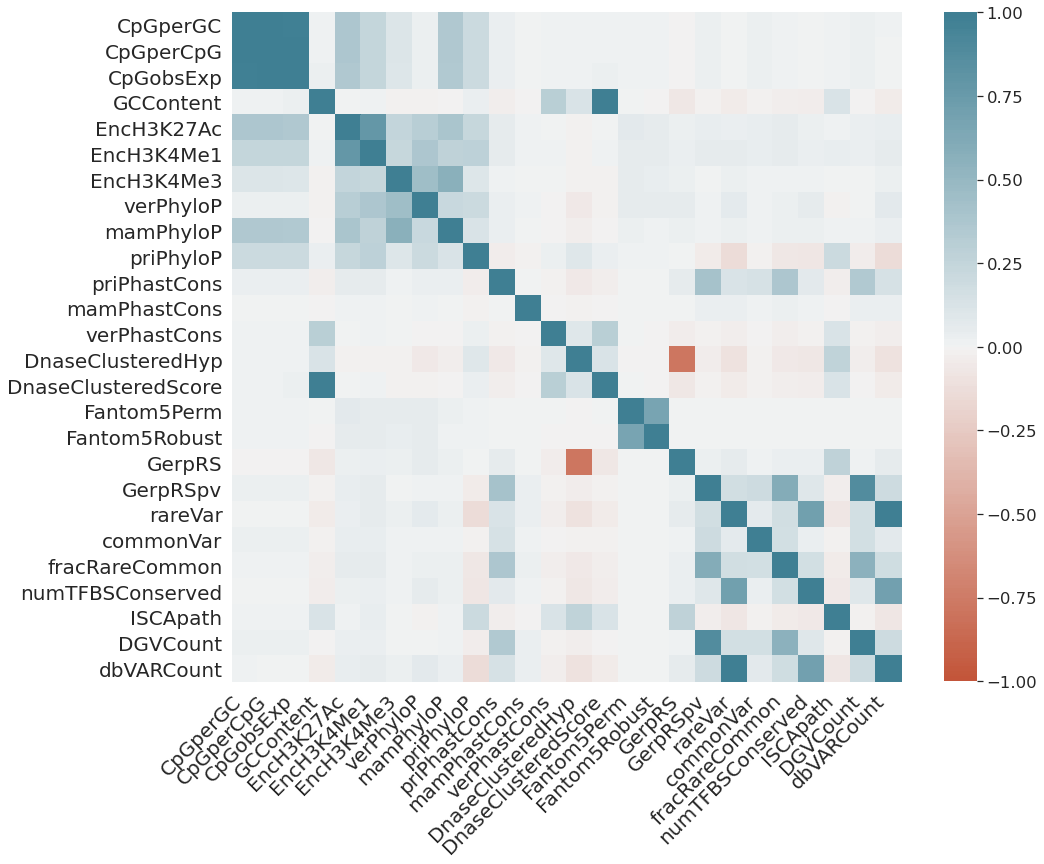

In [33]:
ll= corr_matrix.columns.str.contains('19',na =False)
cor19 = corr_matrix.loc[ll,ll]
cor19.columns=cor38.columns.str.replace('_19','')
cor19.index=cor38.index.str.replace('_19','')
cor19 = cor19.loc[col,col]
plot_heatmap(cor19,'heatmap19')  

In [7]:
l=corr_matrix.columns.str.contains('38',na =False)
ll= corr_matrix.columns.str.contains('19',na =False)
corr = corr_matrix.loc[l,ll]

corr.columns = corr.columns.str.replace('_19|_38','')
corr.index = corr.index.str.replace('_19|_38','')

corr = corr.loc[:,corr.index]
corr = corr.loc[col,col]
corr
#plot_heatmap(corr,'heatmap')  

#corr.to_latex('figures/corr.tex')

,CpGperGC,CpGperCpG,CpGobsExp,GCContent,EncH3K27Ac,EncH3K4Me1,EncH3K4Me3,verPhyloP,mamPhyloP,priPhyloP,priPhastCons,mamPhastCons,verPhastCons,DnaseClusteredHyp,DnaseClusteredScore,Fantom5Perm,Fantom5Robust,GerpRS,GerpRSpv,rareVar,commonVar,fracRareCommon,numTFBSConserved,ISCApath,DGVCount,dbVARCount
CpGperGC,0.959586,0.951964,0.946127,0.205597,0.107422,0.029000,0.351483,0.006514,0.003924,0.002928,0.016942,0.025902,0.027929,0.364492,0.243960,0.022849,0.008562,0.032942,0.003384,0.020405,0.009604,-0.001904,0.027067,0.016016,0.026314,0.026314
CpGperCpG,0.947090,0.957935,0.950667,0.205192,0.109500,0.027483,0.360805,0.007126,0.004662,0.003171,0.017397,0.026560,0.027945,0.370679,0.245407,0.022582,0.008326,0.032478,0.003596,0.017605,0.008678,-0.002447,0.027759,0.015315,0.024730,0.024730
CpGobsExp,0.942797,0.948713,0.957530,0.202427,0.111582,0.027941,0.360182,0.007228,0.004635,0.003124,0.018273,0.027521,0.029293,0.368570,0.243258,0.022253,0.008425,0.034841,0.003480,0.019740,0.009627,-0.002185,0.027769,0.015428,0.024806,0.024806
GCContent,0.201952,0.201817,0.199669,0.999994,0.103240,0.200641,0.132298,-0.138298,-0.137293,-0.077583,-0.065222,-0.042426,-0.031424,0.231759,0.283985,0.018312,0.014663,-0.037716,-0.016631,0.197341,0.098300,0.005252,-0.007876,0.029292,0.033155,0.033155
EncH3K27Ac,0.003195,0.003237,0.003285,0.010236,0.014130,0.015698,0.010241,0.000061,0.000091,0.000508,0.000236,-0.000270,-0.000250,0.009111,0.009567,0.001891,0.001639,-0.000133,0.000157,-0.000122,-0.000854,0.000674,0.000103,-0.001189,-0.002370,-0.002370
EncH3K4Me1,0.014615,0.014400,0.014557,0.086851,0.051884,0.121014,0.035957,0.002101,0.002274,0.003795,0.005336,-0.000455,0.000153,0.055538,0.068324,0.007554,0.007946,0.000208,0.002241,-0.006950,-0.013574,0.009357,0.001412,-0.015756,-0.023739,-0.023739
EncH3K4Me3,0.016472,0.016758,0.016800,0.025343,0.022011,0.024816,0.039917,-0.001237,-0.001147,-0.000253,0.001218,0.000307,0.000590,0.024932,0.022608,0.002078,0.001291,0.000361,0.000538,-0.002205,-0.004688,0.003527,-0.000083,-0.005439,-0.002335,-0.002335
verPhyloP,-0.003637,-0.003066,-0.002507,-0.167034,0.020916,0.057098,0.023811,0.674753,0.660072,0.464272,0.189947,0.208493,0.211356,0.027767,0.039408,0.002834,0.003289,0.164793,0.034204,-0.075353,-0.092381,0.050920,0.075475,-0.023907,-0.039696,-0.039696
mamPhyloP,-0.003935,-0.003360,-0.003535,-0.145597,0.015472,0.039878,0.020644,0.540625,0.540654,0.583149,0.149103,0.116396,0.103633,0.017208,0.021153,0.001867,0.002278,0.081819,0.022940,-0.068319,-0.083648,0.044708,0.040118,-0.021681,-0.033835,-0.033835
priPhyloP,-0.001010,-0.000643,-0.000771,-0.127101,0.017035,0.043659,0.022321,0.541174,0.541705,0.692808,0.149730,0.096971,0.086890,0.020637,0.025901,0.002315,0.002409,0.068114,0.019583,-0.061122,-0.078336,0.043081,0.032540,-0.018369,-0.033421,-0.033421


In [20]:
corr.iloc[:,:8].to_latex('figures/corr1.tex')
corr.iloc[:,8:17].to_latex('figures/corr2.tex')
corr.iloc[:,17:].to_latex('figures/corr3.tex')